In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
DEFAULT_TICKS_SIZE = 19
DEFAULT_LABEL_SIZE = 22
DEFAULT_LINEWIDTH = 3.0
DEFAULT_TITLE_SIZE = 26
DEFAULT_LEGEND_SIZE = 19
DEFAULT_TRANSPARENCY = 0.5
DEFAULT_FIG_SIZE = (20,10)

In [3]:
path_project = "/home/louis/Dropbox/ConsultationSimpliphAI/AnalytiqueBourassaGit/UncertaintyForecasting/"

In [4]:
dataframe = pd.read_csv(path_project + "models/scripts/data_accuracy_and_deviation_score_with_time_and_waic.csv")

In [5]:
dataframe.drop("Unnamed: 0",inplace=True,axis=1)

In [6]:
dataframe.head()

,accuracy_without_temperatures,accuracy_with_temperatures,deviation_without_temperatures,deviation_with_temperatures,calculation_time_without_temperatures,calculation_time_with_temperatures,WAIC_without_temperatures,WAIC_time_with_temperatures
0,97.777778,93.333333,0.057253,0.039043,455.979787,393.568035,245.014718,518.671257
1,91.111111,93.333333,0.056327,0.039043,451.308940,387.813097,238.703270,474.198063
2,95.555556,93.333333,0.063735,0.040586,525.976720,390.096752,244.139803,561.782978
3,95.555556,95.555556,0.056944,0.038426,468.907856,389.587425,232.672293,437.784940
4,86.666667,100.000000,0.068056,0.044907,466.914460,401.278139,255.390774,568.041791


In [7]:
dataframe.describe()

,accuracy_without_temperatures,accuracy_with_temperatures,deviation_without_temperatures,deviation_with_temperatures,calculation_time_without_temperatures,calculation_time_with_temperatures,WAIC_without_temperatures,WAIC_time_with_temperatures
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,90.933333,92.977778,0.060006,0.042451,466.741090,399.086322,246.759053,538.483258
std,4.683804,4.497641,0.006137,0.006675,36.505907,4.375241,11.795554,59.908915
min,80.000000,77.777778,0.044290,0.031327,408.550487,387.813097,220.570136,434.671753
25%,86.666667,91.111111,0.056327,0.038580,443.634817,396.535312,238.818985,501.699905
50%,91.111111,93.333333,0.060185,0.041821,459.960440,399.920195,245.626298,541.138283
75%,93.333333,95.555556,0.064198,0.045216,492.904192,401.823814,255.341717,570.526319
max,100.000000,100.000000,0.074846,0.058179,550.973876,408.527090,269.422569,666.186885


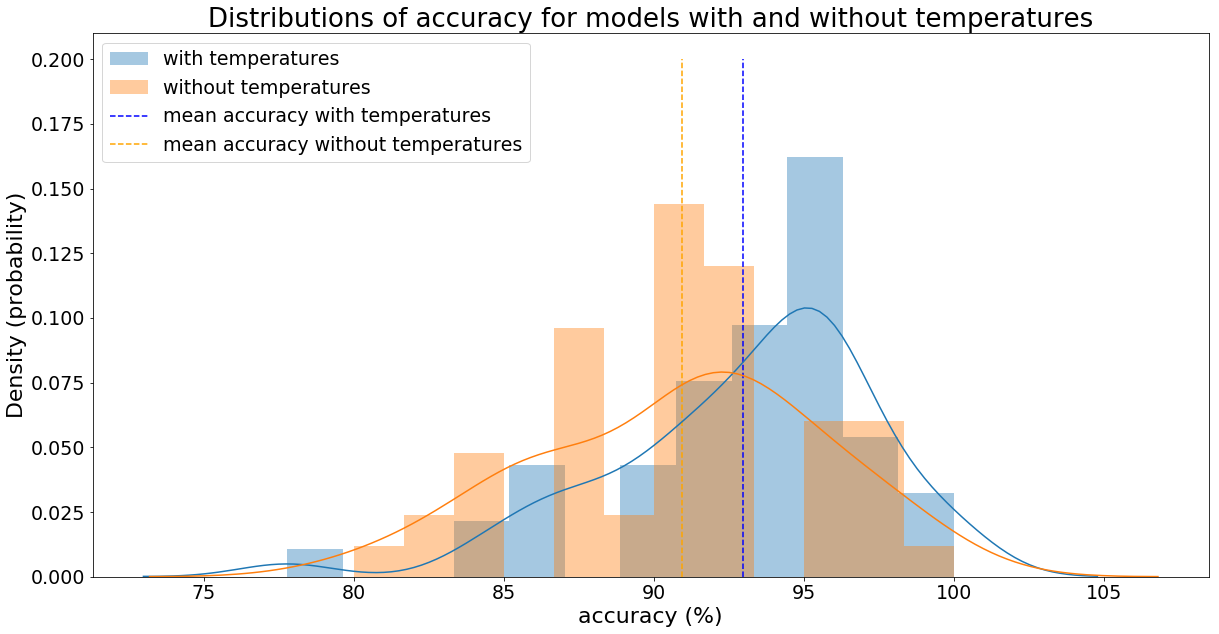

In [44]:
fig  = plt.figure(figsize=DEFAULT_FIG_SIZE)

args_displot={"hist":True,
             "kde":True,
             "norm_hist":True,
             "bins":12,
             "rug":False}

sns.distplot(dataframe["accuracy_with_temperatures"],
             **args_displot,
             label="with temperatures")

sns.distplot(dataframe["accuracy_without_temperatures"],
             **args_displot,
             label="without temperatures")

plt.vlines(x=dataframe["accuracy_with_temperatures"].mean(),
           ymin=0,
           ymax=0.2,
           colors="b",
          linestyles="dashed",
          label="mean accuracy with temperatures")

plt.vlines(x=dataframe["accuracy_without_temperatures"].mean(),
           ymin=0, 
           ymax=0.2,
           colors="orange",
          linestyles="dashed",
          label="mean accuracy without temperatures" )


plt.xlabel("accuracy (%)", size=DEFAULT_LABEL_SIZE)
plt.ylabel("Density (probability)", size=DEFAULT_LABEL_SIZE)
plt.title("Distributions of accuracy for models with and without temperatures",
          size=DEFAULT_TITLE_SIZE)

plt.xticks(fontsize=DEFAULT_TICKS_SIZE)
plt.yticks(fontsize=DEFAULT_TICKS_SIZE)
    
plt.legend(fontsize=DEFAULT_LEGEND_SIZE)

plt.show()

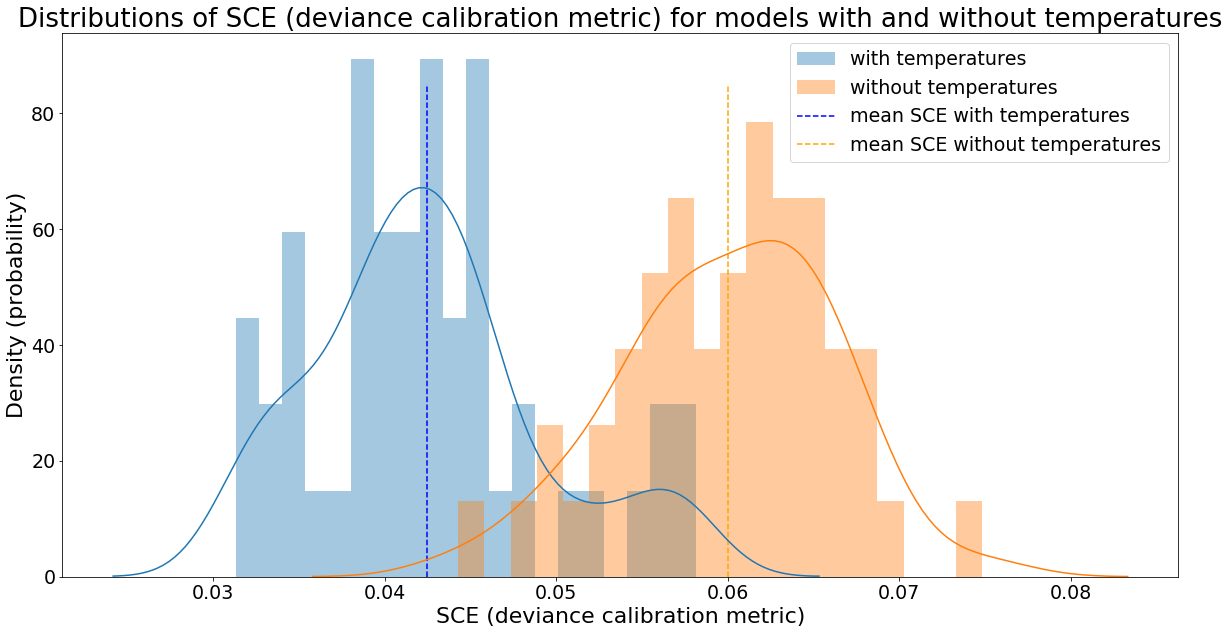

In [42]:
fig  = plt.figure(figsize=DEFAULT_FIG_SIZE)

args_displot={"hist":True,
             "kde":True,
             "norm_hist":False,
             "bins":20,
             "rug":False}

sns.distplot(dataframe["deviation_with_temperatures"],
             **args_displot,
             label="with temperatures")

sns.distplot(dataframe["deviation_without_temperatures"],
             **args_displot,
             label="without temperatures")

plt.vlines(x=dataframe["deviation_with_temperatures"].mean(),
           ymin=0,
           ymax=85,
           colors="b",
          linestyle="dashed",
          label="mean SCE with temperatures")

plt.vlines(x=dataframe["deviation_without_temperatures"].mean(),
           ymin=0, 
           ymax=85,
           colors="orange",
          linestyle="dashed",
          label="mean SCE without temperatures")

plt.xlabel("SCE (deviance calibration metric)", size=DEFAULT_LABEL_SIZE)
plt.ylabel("Density (probability)", size=DEFAULT_LABEL_SIZE)

plt.title("Distributions of SCE (deviance calibration metric) for models with and without temperatures",
          size=DEFAULT_TITLE_SIZE)

plt.xticks(fontsize=DEFAULT_TICKS_SIZE)
plt.yticks(fontsize=DEFAULT_TICKS_SIZE)
    
plt.legend(fontsize=DEFAULT_LEGEND_SIZE)

plt.show()

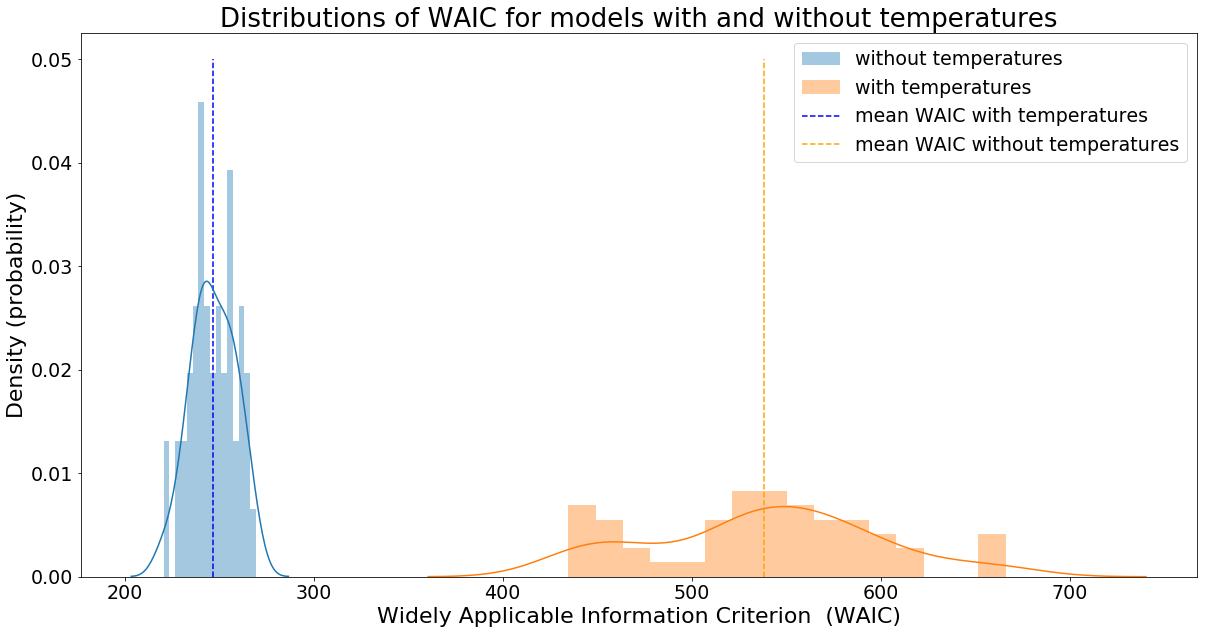

In [46]:
fig  = plt.figure(figsize=DEFAULT_FIG_SIZE)

args_displot={"hist":True,
             "kde":True,
             "norm_hist":False,
             "bins":16,
             "rug":False}

sns.distplot(dataframe["WAIC_without_temperatures"],
             **args_displot,
             label="without temperatures")

sns.distplot(dataframe["WAIC_time_with_temperatures"],
             **args_displot,
             label="with temperatures")

plt.vlines(x=dataframe["WAIC_without_temperatures"].mean(),
           ymin=0,
           ymax=0.05,
           colors="b",
          linestyle="dashed",
          label="mean WAIC with temperatures"
          )

plt.vlines(x=dataframe["WAIC_time_with_temperatures"].mean(),
           ymin=0, 
           ymax=0.05,
           colors="orange",
           linestyle="dashed",
           label="mean WAIC without temperatures")

plt.xlabel("Widely Applicable Information Criterion  (WAIC)", size=DEFAULT_LABEL_SIZE)
plt.ylabel("Density (probability)", size=DEFAULT_LABEL_SIZE)

plt.title("Distributions of WAIC for models with and without temperatures",
          size=DEFAULT_TITLE_SIZE)

plt.xticks(fontsize=DEFAULT_TICKS_SIZE)
plt.yticks(fontsize=DEFAULT_TICKS_SIZE)
    
plt.legend(fontsize=DEFAULT_LEGEND_SIZE)

plt.show()

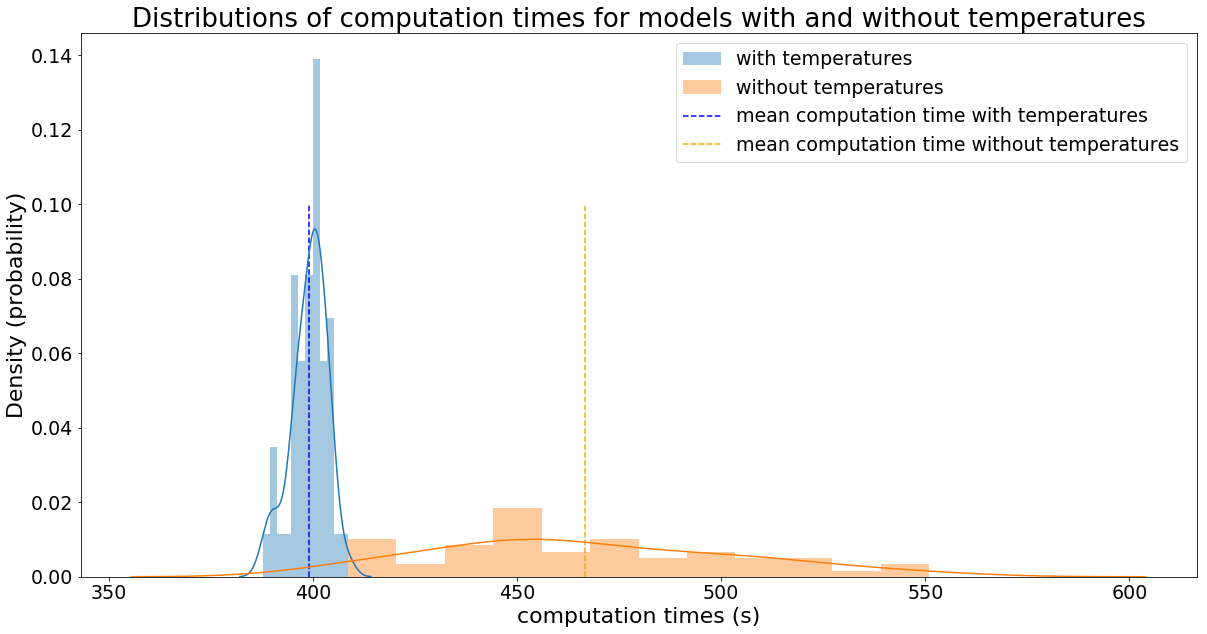

In [48]:
fig  = plt.figure(figsize=DEFAULT_FIG_SIZE)

args_displot={"hist":True,
             "kde":True,
             "norm_hist":False,
             "bins":12,
             "rug":False}

sns.distplot(dataframe["calculation_time_with_temperatures"],
             **args_displot,
             label="with temperatures")

sns.distplot(dataframe["calculation_time_without_temperatures"],
             **args_displot,
             label="without temperatures")

plt.vlines(x=dataframe["calculation_time_with_temperatures"].mean(),
           ymin=0,
           ymax=0.1,
           colors="b",
          linestyle="dashed",
          label="mean computation time with temperatures")

plt.vlines(x=dataframe["calculation_time_without_temperatures"].mean(),
           ymin=0, 
           ymax=0.1,
           colors="orange",
          linestyle="dashed",
          label="mean computation time without temperatures")

plt.xlabel("computation times (s)", size=DEFAULT_LABEL_SIZE)
plt.ylabel("Density (probability)", size=DEFAULT_LABEL_SIZE)

plt.title("Distributions of computation times for models with and without temperatures",
          size=DEFAULT_TITLE_SIZE)

plt.xticks(fontsize=DEFAULT_TICKS_SIZE)
plt.yticks(fontsize=DEFAULT_TICKS_SIZE)
    
plt.legend(fontsize=DEFAULT_LEGEND_SIZE)

plt.show()

In [12]:
dataframe.head(50)

,accuracy_without_temperatures,accuracy_with_temperatures,deviation_without_temperatures,deviation_with_temperatures,calculation_time_without_temperatures,calculation_time_with_temperatures,WAIC_without_temperatures,WAIC_time_with_temperatures
0,97.777778,93.333333,0.057253,0.039043,455.979787,393.568035,245.014718,518.671257
1,91.111111,93.333333,0.056327,0.039043,451.308940,387.813097,238.703270,474.198063
2,95.555556,93.333333,0.063735,0.040586,525.976720,390.096752,244.139803,561.782978
3,95.555556,95.555556,0.056944,0.038426,468.907856,389.587425,232.672293,437.784940
4,86.666667,100.000000,0.068056,0.044907,466.914460,401.278139,255.390774,568.041791
5,84.444444,77.777778,0.064352,0.056636,439.251062,397.735187,265.647688,655.059298
6,91.111111,95.555556,0.052623,0.034722,443.383005,399.129515,240.814774,520.896680
7,97.777778,97.777778,0.066821,0.041512,452.859754,403.844399,241.612988,569.911465
8,91.111111,91.111111,0.063735,0.040586,415.834626,396.299837,244.113676,592.990416
9,80.000000,91.111111,0.054784,0.039660,485.314409,397.192851,262.716232,601.410380
